In [1]:
from sklearn.datasets import make_blobs

import numpy as np

X, y = make_blobs(n_samples=100, centers=4, cluster_std=0.60, random_state=0)

uX0, uX1 = np.mean(X, axis=0)
sX0, sX1 = np.std(X, axis=0)

In [17]:
def k_meansClustering(x, k, centroids):
    nRow, nCol = x.shape
    
    clusterAssigned = np.zeros(shape=(nRow, 2), dtype=float)
    iter = 1
    clusterUpdated = True
    while clusterUpdated:
        print ("\n\n====== Iteration {} ======".format(iter))
        for i in range(nRow):
            minDist = np.inf
            minIndex = -1
            for j in range(k):
                distJ1 = normDist(centroids[j], x[i])
                if distJ1 < minDist:
                    minDist = distJ1
                    minIndex = j
            clusterAssigned[i] = [minIndex, minDist]
        
        _centroids=np.zeros(shape = (k, x.shape[1]), dtype=float)
        for cent in range(k):
            _centroids[cent] = np.mean(x[clusterAssigned[:, 0] == cent], axis=0)
            
        comparison = np.equal(centroids, _centroids)
        if comparison.all() == True:
            print ("\n.....NOT Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            clusterUpdated = False
            return centroids, clusterAssigned
        else:
            print ("\n.....Updating Centroids\n {} => \n{}".format(centroids, _centroids))
            centroids[:, :] = _centroids[:, :]
            iter += 1

In [18]:
def draw(x, centroids):
    import matplotlib.pyplot as plt
    plt.scatter(x[:,0], x[:,1], color='blue')
    plt.scatter(centroids[:,0], centroids[:,1], color='red')

In [19]:
def normDist(x1, x2):
    return np.linalg.norm(x1 - x2)

### 문제 1: 클러스터의 중심점을 몇 회만에 찾는지, 매 반복 중심값만을 출력한다.

- 위 cell에서 매 수행마다 바뀌는 centroids의 점을 출력하였다.

- 4번만에 찾아내었다.



====== Iteration 1 ======

.....Updating Centroids
 [[-1.53677297  1.53383102]
 [ 1.61324282  1.53383102]
 [-1.53677297  6.5734818 ]
 [ 1.61324282  6.5734818 ]] => 
[[-1.44593934  3.11923901]
 [ 1.76899692  1.55513831]
 [-1.23180895  7.26818137]
 [ 1.02554911  4.82690004]]


====== Iteration 2 ======

.....Updating Centroids
 [[-1.44593934  3.11923901]
 [ 1.76899692  1.55513831]
 [-1.23180895  7.26818137]
 [ 1.02554911  4.82690004]] => 
[[-1.46984735  3.1570263 ]
 [ 1.97918933  0.97920012]
 [-1.27208964  7.74944718]
 [ 0.91568734  4.32895204]]


====== Iteration 3 ======

.....Updating Centroids
 [[-1.46984735  3.1570263 ]
 [ 1.97918933  0.97920012]
 [-1.27208964  7.74944718]
 [ 0.91568734  4.32895204]] => 
[[-1.52704861  3.14337865]
 [ 1.97918933  0.97920012]
 [-1.27208964  7.74944718]
 [ 0.87673717  4.2964758 ]]


====== Iteration 4 ======

.....NOT Updating Centroids
 [[-1.52704861  3.14337865]
 [ 1.97918933  0.97920012]
 [-1.27208964  7.74944718]
 [ 0.87673717  4.2964758 ]] => 
[

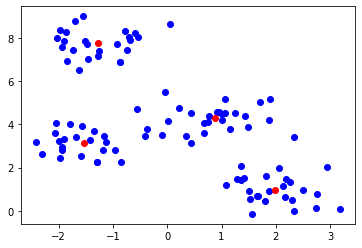

In [21]:
centroids = np.array(
    [[uX0 - sX0, uX1 - sX1], 
     [uX0 + sX0, uX1 - sX1],
     [uX0 - sX0, uX1 + sX1],
     [uX0 + sX0, uX1 + sX1]], dtype=float)
k = 4

k_meansClustering(X, k, centroids)
draw(X, centroids)

### 문제 2 : 클러스터가 맞는지 비교하여 동일한지 확인하세요.

- 기존의 label과 일치하는지 확인하면 된다.

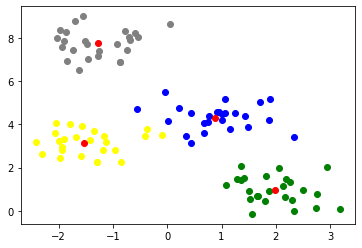

In [50]:
%matplotlib inline
import matplotlib.pyplot as plt

colors = ["blue", "green", "yellow", "gray"]
nLabel = 4

for label in range(nLabel):
    plt.scatter(X[y == label][:, 0], X[y == label][:, 1], color=colors[label])
plt.scatter(centroids[:, 0], centroids[:, 1], color="red")


- label 별로 색깔을 칠했더니 잘 분류한 것을 확인할 수 있다.